In [1]:
# THIS EXAMPLE SETS UP A CRPROPA RUN AN DISPLAYS THE RESULTS
%matplotlib inline 
from pylab import *
import numpy as np


# Define source parameters
redshift = np.log10(0.01)
energy   = np.log10(6.e19) # eV
Z = 8  # oxyen
A = 16 # isotope 
num = 10000 # simulate 10000 particles

com = '../01_Yields/crpropa_run.py -E %1.2f -log10_redshift %1.2f -Z %d -A %d -nparticles %d -o example_yield_output -od .'%(energy, redshift, Z, A, num)

import os
os.system(com)

0

In [2]:
# load output file
f = np.load('example_yield_output.npz')
# list the output arrays and their shape
print f.keys()

['A_list', 'nucleon_histograms', 'num_particles', 'neutrino_histogram', 'energy_bins', 'input_energy']


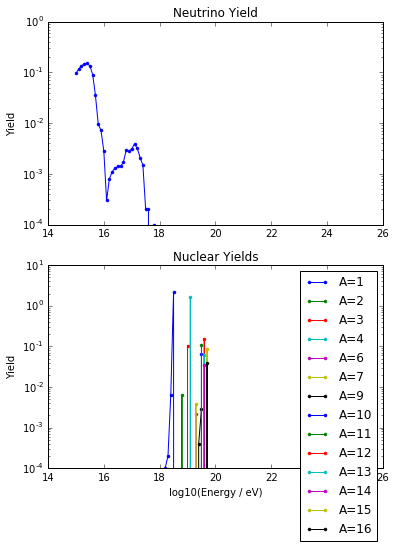

In [3]:
# make some plot
figure(figsize=(6,8))
ax=subplot(211)
ax.set_yscale('log')
delta_bin = np.diff(f['energy_bins'])[0]
plot(f['energy_bins'][1:]-delta_bin, f['neutrino_histogram']/float(f['num_particles']), '.-' )
ylabel('Yield')
title('Neutrino Yield')
ax2=subplot(212)
ax2.set_yscale('log')
for k in range(0,len(f['A_list'])):
    plot(f['energy_bins'][1:]-delta_bin, f['nucleon_histograms'][k]/float(f['num_particles']), '.-', label='A=%d'%(f['A_list'][k]))
legend(loc=0)
title('Nuclear Yields')
xlabel('log10(Energy / eV)')
ylabel('Yield')
    
f.close()

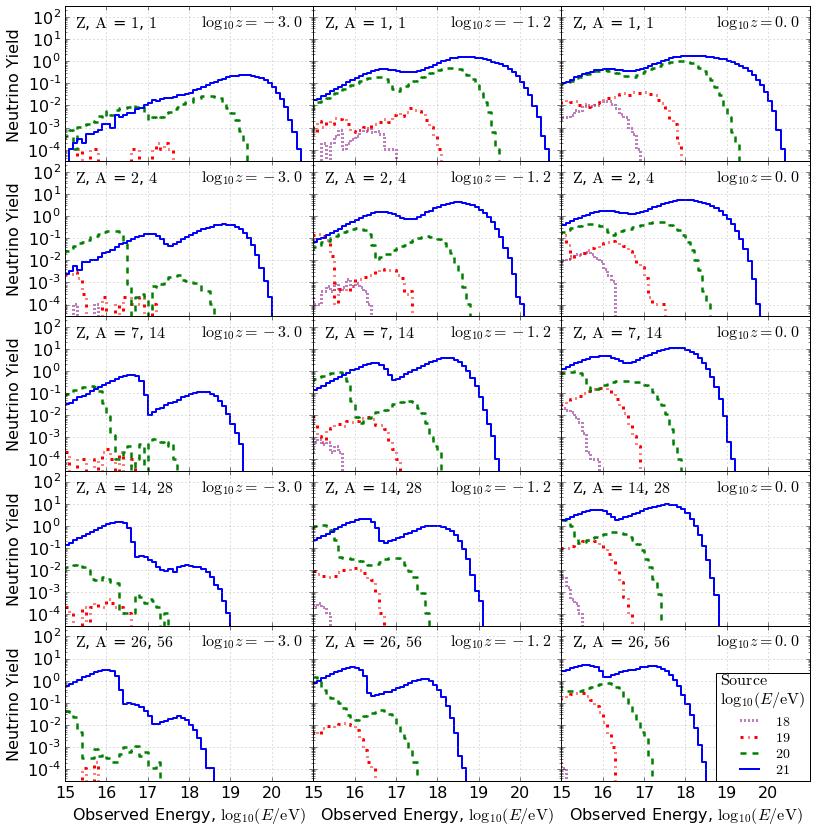

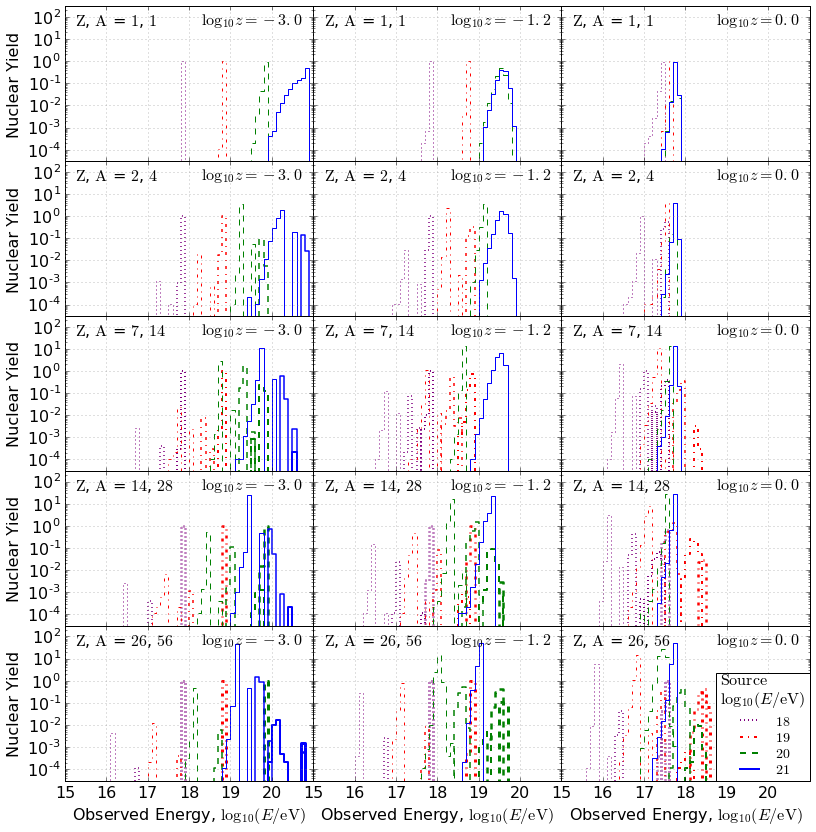

In [14]:
# make some plot
npz_files_dir = '/halo_nobackup/eva/romerowo/crpropa_production_run_outputs/20161026/'

log10_z_list = [-3.0, -1.2, 0.0]
Z_list = [1,2,7,14,26]
A_list = [1,4,14,28,56]

rcParams['font.size']=16
figure(1, figsize=(14*0.85,14*0.85))
figure(2, figsize=(14*0.85,14*0.85))
cc=0
colors = ['purple', 'r', 'g', 'b']
ls = [':', '-.', '--', '-']
lw = [3, 3, 2.5, 2]
for i in range(0,len(A_list)):
    for j in range(0,len(log10_z_list)):
        cc_en=0
        #for en in [21.0, 20.0, 19.0, 18.0]:
        for en in [18.0, 19.0, 20.0, 21.0]:
            # load output file
            fnm = npz_files_dir + 'Z_%d/run_E_%1.1f_Z_%d_A_%d_r_%1.1f.npz'%(Z_list[i],en, Z_list[i],A_list[i],log10_z_list[j])
            f = np.load(fnm)
            # list the output arrays and their shape
            e_bins = f['energy_bins'][:-1]
            yld  = f['neutrino_histogram'].astype('float')+0.1
            yld /= float(f['num_particles'])
            f_A_list = f['A_list']
            nucleon_histograms = f['nucleon_histograms']
            num_particles = float(f['num_particles'])

            yl_1_2 = 1.e-5*np.ones(100)
            yl_3_6 = 1.e-5*np.ones(100)
            yl_7_19 = 1.e-5*np.ones(100)
            yl_20_39 = 1.e-5*np.ones(100)
            yl_40_56 = 1.e-5*np.ones(100)
            yl_all = 0.1*np.ones(100)
            for k in range(0,len(f_A_list)):
                if f_A_list[k]>=1 and f_A_list[k]<=2:
                    yl_1_2 += nucleon_histograms[k]/num_particles
                if f_A_list[k]>=3 and f_A_list[k]<=6:
                    yl_3_6 += nucleon_histograms[k]/num_particles
                if f_A_list[k]>=7 and f_A_list[k]<=19:
                    yl_7_19 += nucleon_histograms[k]/num_particles
                if f_A_list[k]>=20 and f_A_list[k]<=39:
                    yl_20_39 += nucleon_histograms[k]/num_particles
                if f_A_list[k]>=40 and f_A_list[k]<=56:
                    yl_40_56 += nucleon_histograms[k]/num_particles
                yl_all += nucleon_histograms[k]/num_particles
            #print f['nucleon_histograms'].shape
            #f['nucleon_histograms'][1:3].shape
            #yl_1 = f['nucleon_histograms'][1:3].shape
            #semilogy(e_bins,/float(f['num_particles'])
            
            f.close()
            
            figure(2)
            ax=subplot(len(Z_list), len(log10_z_list), cc+1)
            #semilogy(e_bins, yl_all, drawstyle='step')
            semilogy(e_bins, yl_40_56, drawstyle='steps', lw=3.0, ls=ls[cc_en], color=colors[cc_en])
            semilogy(e_bins, yl_20_39, drawstyle='steps', lw=2.5, ls=ls[cc_en], color=colors[cc_en])
            semilogy(e_bins, yl_7_19, drawstyle='steps', lw=2.0, ls=ls[cc_en], color=colors[cc_en], label='$%1.0f$'%en)
            semilogy(e_bins, yl_3_6, drawstyle='steps', lw=1.5, ls=ls[cc_en], color=colors[cc_en])
            semilogy(e_bins, yl_1_2, drawstyle='steps', lw=1, ls=ls[cc_en], color=colors[cc_en])
            #semilogy(e_bins, yl_all, drawstyle='step', color=colors[cc_en])
            xticks([15., 16., 17., 18., 19., 20.])
            if(cc+1 <= len(Z_list)*len(log10_z_list) - len(log10_z_list)):
                #xticks([])
                setp( ax.get_xticklabels(), visible=False)
            if((cc)%len(log10_z_list)!=0):
                setp( ax.get_yticklabels(), visible=False)
            if((cc)%len(log10_z_list)==0):
                ylabel('Nuclear Yield')
            if(cc+1 > len(Z_list)*len(log10_z_list) - len(log10_z_list)):
                xlabel('Observed Energy, $\log_{10}(E/\mathrm{eV})$')
            if(cc+1==len(Z_list)*len(log10_z_list)):
                legend(loc=4, fontsize=14, borderaxespad=0., borderpad=0.3, frameon=True, labelspacing=0.15, title='$\mathrm{Source}$\n$\log_{10}(E/\mathrm{eV})$')


            figure(1)
            ax=subplot(len(Z_list), len(log10_z_list), cc+1)
            semilogy(e_bins, yld, drawstyle='steps', lw=lw[cc_en], ls=ls[cc_en], color=colors[cc_en], label='$%1.0f$'%en)
            xticks([15.,16.,  17., 18., 19., 20.])
            if(cc+1 <= len(Z_list)*len(log10_z_list) - len(log10_z_list)):
                #xticks([])
                setp( ax.get_xticklabels(), visible=False)
            if((cc)%len(log10_z_list)!=0):
                #yticks([])
                setp( ax.get_yticklabels(), visible=False)
            if((cc)%len(log10_z_list)==0):
                ylabel('Neutrino Yield')
            if(cc+1 > len(Z_list)*len(log10_z_list) - len(log10_z_list)):
                xlabel('Observed Energy, $\log_{10}(E/\mathrm{eV})$')
            if(cc+1==len(Z_list)*len(log10_z_list)):
                legend(loc=4, fontsize=14, borderaxespad=0., borderpad=0.3,  frameon=True, labelspacing=0.15, title='$\mathrm{Source}$\n$\log_{10}(E/\mathrm{eV})$')
            cc_en+=1

        figure(2)
        text_val1 = '$\mathrm{Z}$, $\mathrm{A}$ = $%d$, $%d$\n'%(Z_list[i], A_list[i])
        text_val2 =r'$\log_{10}z = %1.1f$'%log10_z_list[j]
        text(15.25, 180., text_val1, va='top', ha='left')
        text(20.75, 180., text_val2, va='top', ha='right')
        xlim(15.,21.)
        ylim(3.e-5, 3.e2)
        grid(True, color='gray')
        figure(1)
        text(15.25, 150., text_val1, va='top', ha='left')
        text(20.75, 150., text_val2, va='top', ha='right')
        xlim(15.,21.)
        ylim(3.e-5, 3.e2)
        grid(True, color='gray')
        cc+=1
figure(1)
tight_layout()
subplots_adjust(hspace=0.0, wspace=0.0)
savefig('neutrino_yields.pdf')
figure(2)
tight_layout()
subplots_adjust(hspace=0.0, wspace=0.0)
savefig('nuclear_yields.pdf')

